In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (see Bayes classifier). They are among the simplest Bayesian network models,but coupled with kernel density estimation, they can achieve higher accuracy levels.

In [81]:
# importing essential libraries required
import pandas as pd 

In [82]:
# spacfiy coulmns name and read the data set
header_list = ['label','Alcohol','Malic acid','Ash','Alcalinity of ash' , 'Magnesium'	, 'Total phenols',  'Flavanoids',  'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline' ]
data = pd.read_csv('wine.data',names=header_list, header=None)


**NOTE:** Our dataset does not contain character variables

In [83]:
data.head()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [84]:
data.shape

(178, 14)

In [85]:
data['label'].value_counts()

2    71
1    59
3    48
Name: label, dtype: int64

In [86]:
# check dublicated 
duplicate = data[data.duplicated()]
print("Dublicate Roes :",duplicate)

Dublicate Roes : Empty DataFrame
Columns: [label, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []


In [87]:
data.isnull().sum().sum()

0

In [88]:
data.describe()

,label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [89]:
# split X for features and y for label
X = data.drop(['label'],axis=1)
y = data.label
print(X.shape,y.shape)

(178, 13) (178,)


In [90]:
# importing split library required
from sklearn.model_selection import train_test_split
Xtrain , Xtest , ytrain , ytest = train_test_split(X,y,train_size=0.2,random_state=0)
shapes = " Xtrain shape {} \n Xtest shape {} \n ytrain shape {} \n ytest shape {}".format(Xtest.shape, Xtrain.shape,ytrain.shape , ytest.shape)

print(shapes)

 Xtrain shape (143, 13) 
 Xtest shape (35, 13) 
 ytrain shape (35,) 
 ytest shape (143,)


**NOTE:** After this step you can use Feature Scaling for better performance

In [91]:
# Import naive bayes library
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

ypred = NB.fit(Xtrain, ytrain).predict(Xtest)
print("Number of mislabeled points out of a total %d points : %d"
       % (Xtest.shape[0], (ytest != ypred).sum()))

Number of mislabeled points out of a total 143 points : 5


**Acuracy**

[For More](https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/)

Precision: 0.965
Recall: 0.965
Accuracy: 0.965
F1 Score: 0.965

 



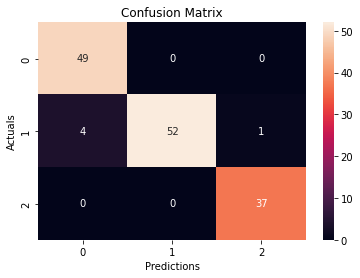

In [92]:
# Calculate the precision_score, recall_score, f1_score, confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(ytest, ypred)
print('Precision: %.3f' % precision_score(ytest, ypred ,average='micro'))
print('Recall: %.3f' % recall_score(ytest, ypred,average='micro'))
print('Accuracy: %.3f' % accuracy_score(ytest, ypred))
print('F1 Score: %.3f' % f1_score(ytest, ypred,average='micro'))
print('\n \n')
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.show()